In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_medidas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")

In [3]:
df_medidas.sample(10)

,comprimento,altura,largura,amostra
448,20.08,14.91,5.07,C
325,20.05,14.94,5.01,B
361,19.98,15.02,5.04,B
991,19.98,15.02,5.03,E
397,20.08,14.91,5.02,B
665,20.06,14.93,5.08,D
941,20.09,14.91,5.01,E
460,19.95,15.05,5.00,C
656,20.05,14.95,5.04,D
377,20.16,14.83,5.07,B


In [4]:
df_medidas.describe()

,comprimento,altura,largura
count,1000.000000,1000.00000,1000.000000
mean,20.025740,14.97233,5.000050
std,0.059189,0.06294,0.051081
min,19.910000,14.69000,4.840000
25%,19.980000,14.93000,4.970000
50%,20.020000,14.99000,5.000000
75%,20.060000,15.02000,5.030000
max,20.250000,15.09000,5.190000


<div align="center">
<font size=5 color="Green"> Perguntas </font>
</div>

1. Para cada uma das amostras, A-E, como está distribuído o comprimento?  
    - Comparação entre as amostras.
2. Apenas para a amostra A, como estão dispostas as medidas de altura e comprimento?
    - Envolver uma regra de negócio que rejeite os itens:
    - $\pm 1 \%$ de 20 e 15, respectivamente, para comprimento e altura.

## <font color="#8bd1f8">  1. Para cada uma das amostras A-E como está distribuído o comprimento?</font>

In [5]:
amostras = df_medidas["amostra"].unique()
print(f"Trabalhando com {amostras.size} amostras: {amostras}\n")

# Armazenar as medianas
medianas = {}
for amostra in amostras:
    df_i = (df_medidas[df_medidas["amostra"] == amostra])
    mediana = df_i["comprimento"].median()
    medianas[amostra] = mediana

print(f"Medianas obtidas: {medianas}")

medianas_sorted = dict(sorted(medianas.items(), key= lambda x: x[1]))
medianas_sorted

Trabalhando com 5 amostras: ['A' 'B' 'C' 'D' 'E']

Medianas obtidas: {'A': 20.015, 'B': 20.02, 'C': 20.02, 'D': 20.01, 'E': 20.02}


{'D': 20.01, 'A': 20.015, 'B': 20.02, 'C': 20.02, 'E': 20.02}

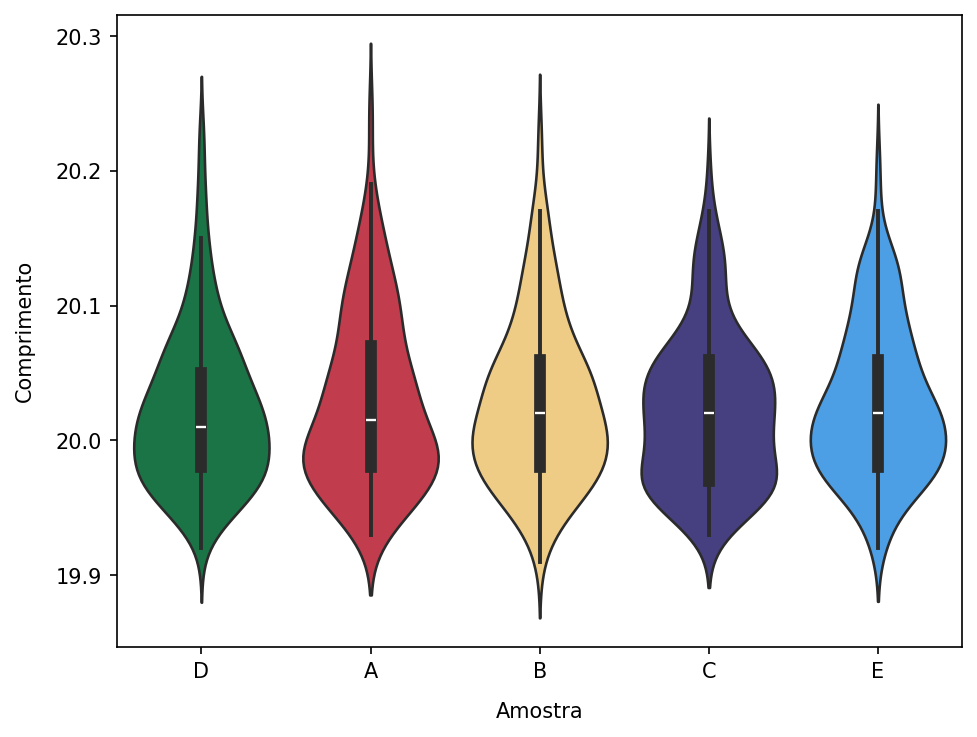

In [6]:
# regra univariada
pal = ["#d7263d", "#ffd275", "#3d348b", "#0c8346", "#33a1fd"]
fig, ax = plt.subplots(dpi=150, layout="constrained")

sns.violinplot(
    data=df_medidas,
    x="amostra",
    hue="amostra",
    y="comprimento",
    order=medianas_sorted.keys(),
    palette=pal,
    legend=False,
    # inner="quartile",
    # cut=0,
)  # ignore

ax.set_xlabel("Amostra", labelpad=10)
ax.set_ylabel("Comprimento", labelpad=10)
plt.show()

---

## <font color="#8bd1f8">2. Apenas para a amostra A, como estão dispostas as medidas de altura e comprimento?</font>

In [7]:
df_a = df_medidas.query("amostra == 'A'")[["comprimento", "altura"]]
df_a

,comprimento,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01
...,...,...
195,19.98,15.02
196,19.99,15.01
197,20.00,15.00
198,20.00,15.00


In [8]:
comprimento = df_a["comprimento"].to_numpy()
altura = df_a["altura"].to_numpy()
cmax = 20*1.01
cmin = 20*0.99

amax = 15*1.01
amin = 15*0.99
not_comp = (comprimento >= cmax) | (comprimento <= cmin) 
not_alt = (altura >= amax) | (altura <= amin)

rejected = (not_comp | not_alt)
accepted = ~rejected

In [9]:
amax

15.15

In [10]:
print("comprimentos:", comprimento.max(), comprimento.min())
print("alturas:",altura.max(), altura.min())

comprimentos: 20.25 19.93
alturas: 15.07 14.69


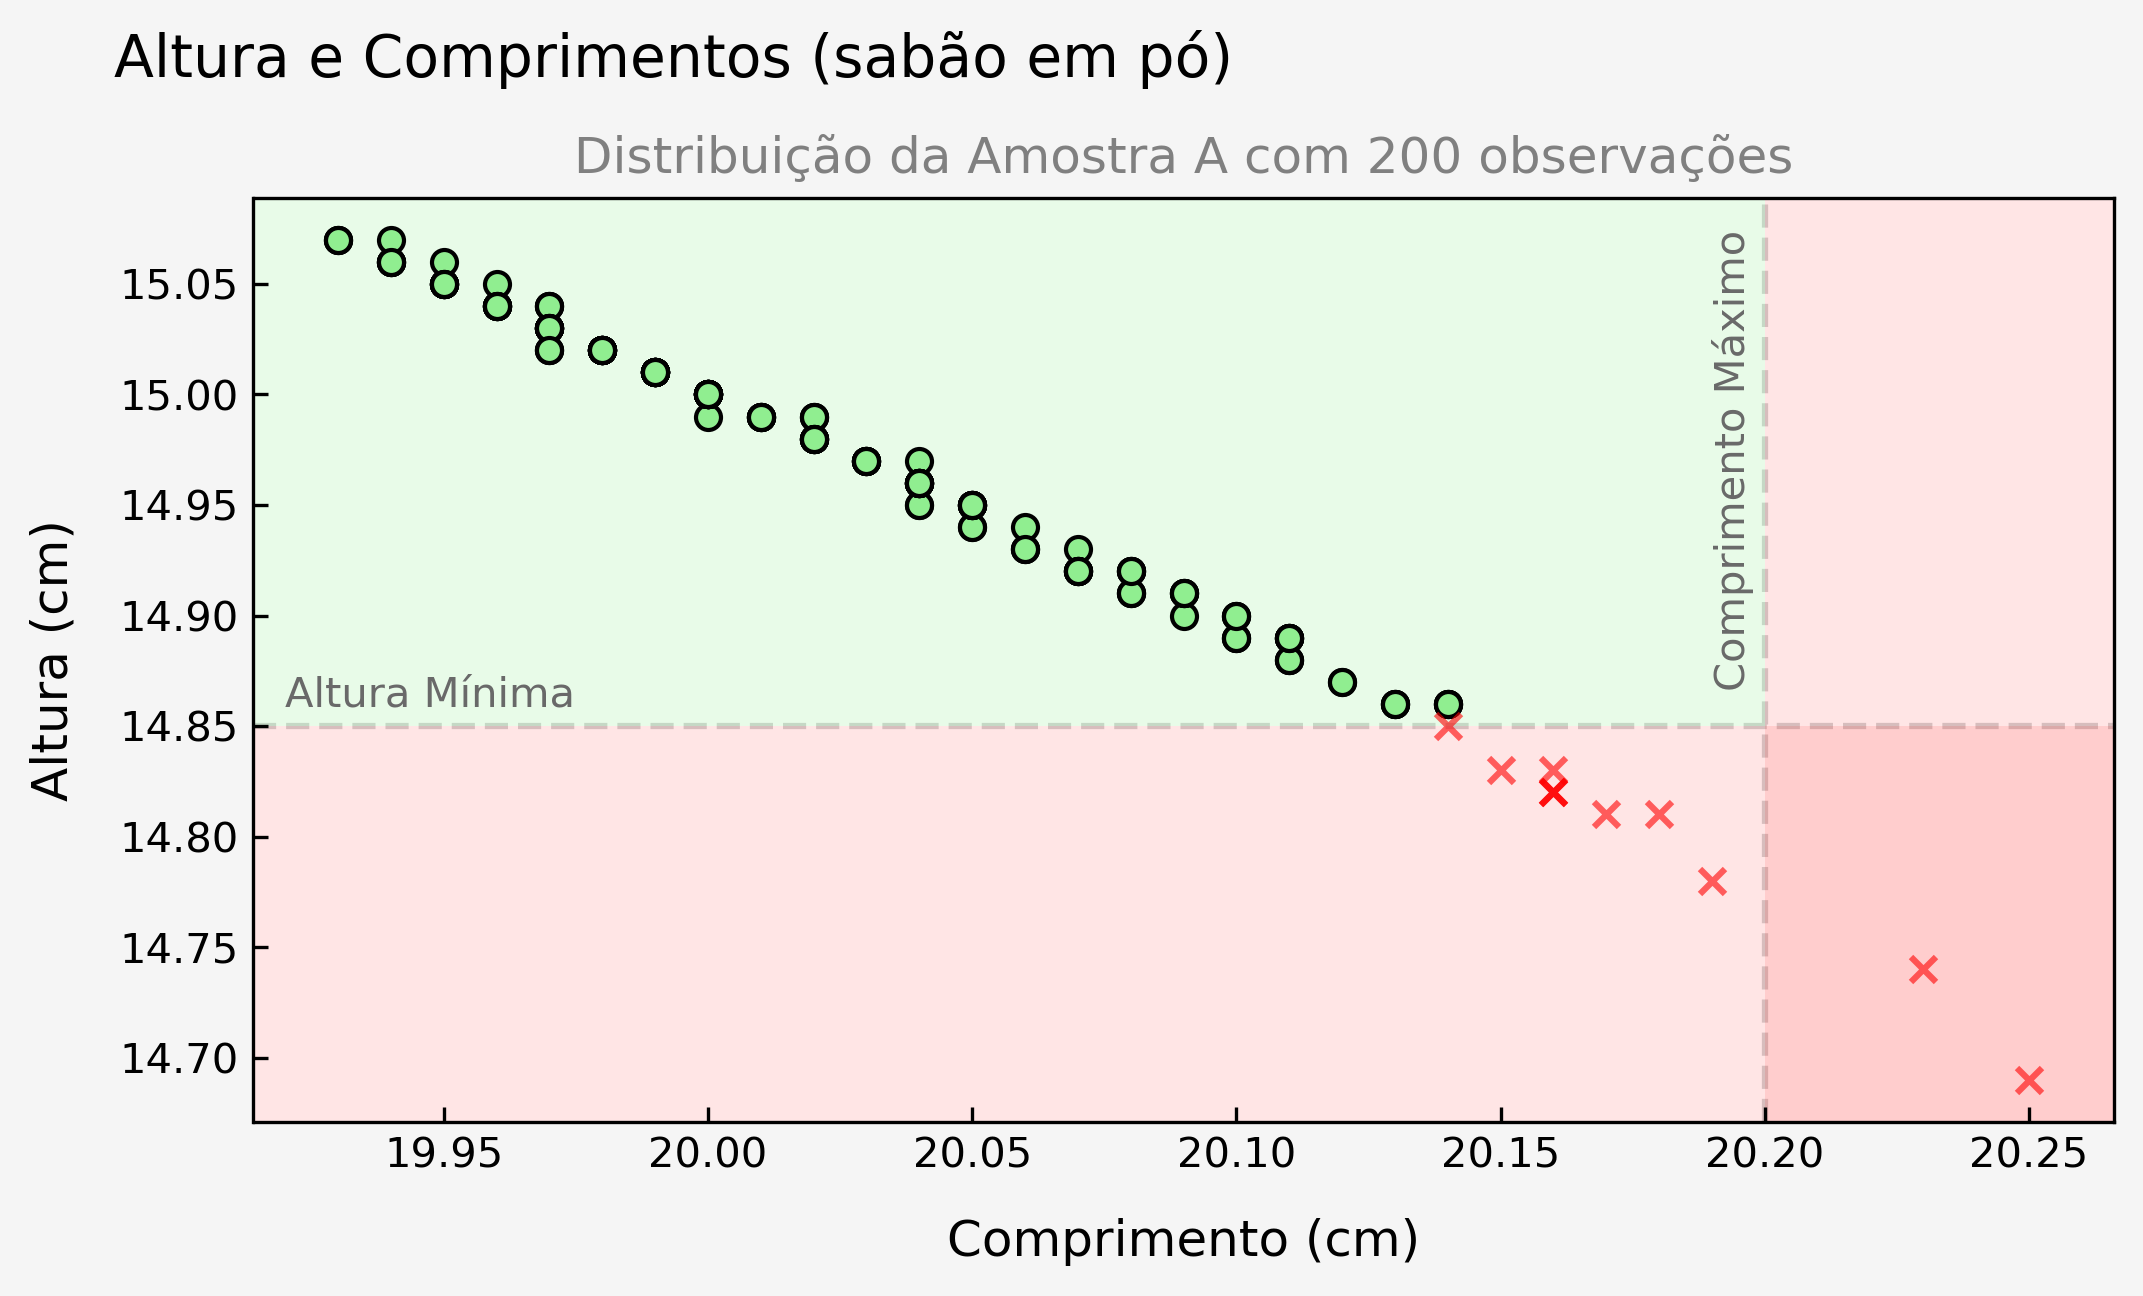

In [15]:
# OK vs REJEITADO
# ---------------
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
fig.set_facecolor("whitesmoke")
fig.suptitle(
    "Altura e Comprimentos (sabão em pó)", size=14, color="black", x=0.3, y=1.02
)
ax.set_title(
    "Distribuição da Amostra A com 200 observações",
    fontsize=12,
    color="gray",
    loc="center",
)
ax.set_ylabel("Altura (cm)", labelpad=10, size=12)
ax.set_xlabel("Comprimento (cm)", labelpad=10, size=12)
ax.scatter(
    x=comprimento[accepted],
    y=altura[accepted],
    color="lightgreen",
    marker="o",
    edgecolors="k",
)
ax.scatter(
    x=df_a.comprimento[rejected],
    y=df_a.altura[rejected],
    color="red",
    marker="x",
    alpha=0.6,
)

ax.axhline(amin, color="lightgray", ls="--", zorder=0)
ax.axvline(cmax, color="lightgray", ls="--", zorder=0)

ax.text(19.92, 14.855, "Altura Mínima", fontsize=10, color="dimgray", va="bottom")
ax.text(20.19, 14.87, "Comprimento Máximo", fontsize=10, color="dimgray", rotation=90)

ax.xaxis.set_tick_params(direction="in")
ax.yaxis.set_tick_params(direction="in")

# ---
# # Regiões
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.fill_between(
    x=[xmin, cmax], y1=amin, y2=ymax, color="lightgreen", alpha=0.2, zorder=0, lw=0
)
ax.axvspan(cmax, xmax, color="red", alpha=0.1, zorder=0, lw=0)
ax.axhspan(ymin, amin, color="red", alpha=0.1, zorder=0, lw=0)

# Restaura os limites originais dos eixos (o preenchimento às vezes tenta expandir o gráfico)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()